In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [2]:
class MultiLinearRegression(nn.Module):
    def __init__(self):
        super(MultiLinearRegression, self).__init__()
        self.linear = nn.Linear(2,1)  # 因为3个变量映射1个输出
        
    def forward(self,x):
        out = self.linear(x)
        return out

model = MultiLinearRegression()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=3e-2)

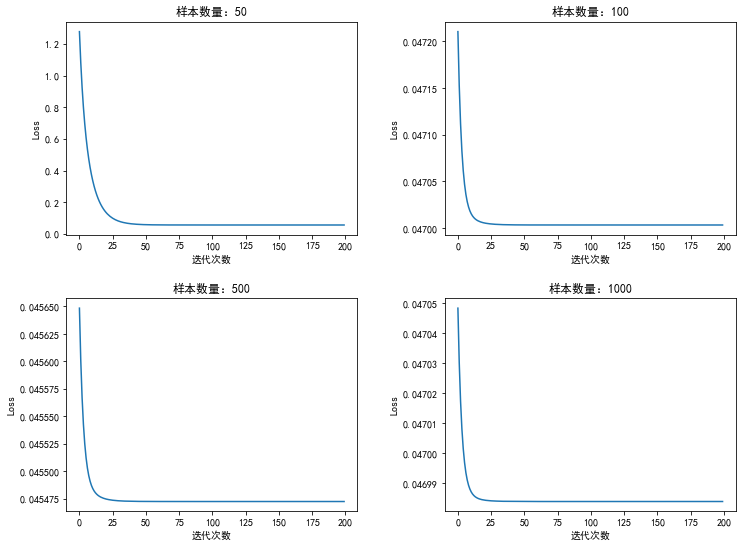

In [3]:
sample = [50, 100, 500, 1000]
torch.manual_seed(0)
flag = 0
plt.figure(figsize=(12, 9))
for num in sample:
    x1 = torch.unsqueeze(torch.linspace(-2, 2, num), dim=1)
    x2 = torch.unsqueeze(torch.linspace(-2, 2, num), dim=1)
    y = (1 + np.sin(2* x1 + 3 * x2))/(3.5 + np.sin(x1 -x2)) + 0.1 * torch.randn(x1.size())
    x = torch.cat((x1,x2), 1)
    flag += 1
    
    cost = []
    num_epochs = 200
    for epoch in range(num_epochs):
        out = model(x)
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost.append(loss.detach())
    
    plt.subplot(2, 2, flag)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.plot(cost)
    plt.xlabel('迭代次数')
    plt.ylabel('Loss')
    plt.title('样本数量：' + str(num))
plt.savefig('../../期末作业/figures/样本数量影响.png', dpi=900)

In [4]:
a == 0

NameError: name 'a' is not defined

In [ ]:
# x1.shape, x2.shape, y.shape, x.shape

In [ ]:
# plt.scatter(x1, y)

In [ ]:
# class LinearRegression(nn.Module):
#     def __init__(self):
#         super(LinearRegression, self).__init__()
#         self.fc = nn.Linear(1, 1)
        
#     def forwaed(self, x1, x2):
#         out = self.fc(x1, x2)
#         return out

class MultiLinearRegression(nn.Module):
    def __init__(self):
        super(MultiLinearRegression, self).__init__()
        self.linear = nn.Linear(2,1)  # 因为3个变量映射1个输出
        
    def forward(self,x):
        out = self.linear(x)
        return out

model = MultiLinearRegression()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=5e-3)

cost = []
num_epochs = 1000
for epoch in range(num_epochs):
    out = model(x)
    loss = criterion(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cost.append(loss.detach())
    
    if (epoch + 1) % 20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.detach().numpy()))

In [ ]:
# plt.figure(figsize=(8,5))
plt.plot(cost)
# plt.title('50个样本loss值')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('50_RMSprop.png',dpi=900)